In [54]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from numpy import pi

truthTable = [
    '000',
    '001',
    '010',
    '011',
    '100',
    '101',
    '110',
    '111'
]

print('dch -> dch -> dch -> dch -> dch -> dch -> dch')

for vec in truthTable:
    qreg_q = QuantumRegister(3,'q')
    creg_c = ClassicalRegister(3+3+3+3+3+3, 'c')
    maxD = QuantumCircuit(qreg_q, creg_c, name='maxD')

    for i, val in enumerate(vec):
        state_vec = [1-int(val) , int(val)] 
        maxD.initialize(state_vec, i)

    maxD.measure([0,1,2], [0,1,2])

    maxD.barrier()
    maxD.x(qreg_q[2])
    maxD.barrier()
    
    maxD.measure([0,1,2], [3,4,5])
    
    maxD.barrier()
    maxD.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
    maxD.barrier()
    
    maxD.measure([0,1,2], [6,7,8])
    
    maxD.barrier()
    maxD.x(qreg_q[2])
    maxD.barrier()
    
    maxD.measure([0,1,2], [9,10,11])
    
    maxD.barrier()
    maxD.cx(qreg_q[0], qreg_q[1])
    maxD.barrier()
    
    maxD.measure([0,1,2], [12,13,14])
    
    maxD.barrier()
    maxD.cx(qreg_q[0], qreg_q[2])
    maxD.barrier()
    
    maxD.measure([0,1,2], [15,16,17])
    
    simulator = Aer.get_backend('qasm_simulator')
    res = execute(maxD, backend=simulator, shots=1).result()
    counts = res.get_counts()
    mes = list(counts.keys()).pop()
    mes1 = ''.join(list(reversed(mes))[0:3])
    mes2 = ''.join(list(reversed(mes))[3:6])
    mes3 = ''.join(list(reversed(mes))[6:9])
    mes4 = ''.join(list(reversed(mes))[9:12])
    mes5 = ''.join(list(reversed(mes))[12:15])
    mes6 = ''.join(list(reversed(mes))[15:18])
    print(
        '{} -> {} -> {} -> {} -> {} -> {} -> {}'.format(
            vec, mes1, mes2, mes3,mes4, mes5, mes6
    ))
    
    maxD.draw()



dch -> dch -> dch -> dch -> dch -> dch -> dch
000 -> 000 -> 001 -> 001 -> 000 -> 000 -> 000
001 -> 001 -> 000 -> 000 -> 001 -> 001 -> 001
010 -> 010 -> 011 -> 111 -> 110 -> 100 -> 101
011 -> 011 -> 010 -> 010 -> 011 -> 011 -> 011
100 -> 100 -> 101 -> 101 -> 100 -> 110 -> 111
101 -> 101 -> 100 -> 100 -> 101 -> 111 -> 110
110 -> 110 -> 111 -> 011 -> 010 -> 010 -> 010
111 -> 111 -> 110 -> 110 -> 111 -> 101 -> 100


In [55]:
maxD.draw()

┌─────────────────┐┌─┐       ░       ░ ┌─┐       ░ ┌───┐ ░ ┌─┐       ░ »
 q_0: ┤ initialize(0,1) ├┤M├───────░───────░─┤M├───────░─┤ X ├─░─┤M├───────░─»
      ├─────────────────┤└╥┘┌─┐    ░       ░ └╥┘┌─┐    ░ └─┬─┘ ░ └╥┘┌─┐    ░ »
 q_1: ┤ initialize(0,1) ├─╫─┤M├────░───────░──╫─┤M├────░───■───░──╫─┤M├────░─»
      ├─────────────────┤ ║ └╥┘┌─┐ ░ ┌───┐ ░  ║ └╥┘┌─┐ ░   │   ░  ║ └╥┘┌─┐ ░ »
 q_2: ┤ initialize(0,1) ├─╫──╫─┤M├─░─┤ X ├─░──╫──╫─┤M├─░───■───░──╫──╫─┤M├─░─»
      └─────────────────┘ ║  ║ └╥┘ ░ └───┘ ░  ║  ║ └╥┘ ░       ░  ║  ║ └╥┘ ░ »
c: 18/════════════════════╩══╩══╩═════════════╩══╩══╩═════════════╩══╩══╩════»
                          0  1  2             3  4  5             6  7  8    »
«            ░ ┌─┐       ░       ░ ┌─┐       ░       ░ ┌─┐      
« q_0: ──────░─┤M├───────░───■───░─┤M├───────░───■───░─┤M├──────
«            ░ └╥┘┌─┐    ░ ┌─┴─┐ ░ └╥┘┌─┐    ░   │   ░ └╥┘┌─┐   
« q_1: ──────░──╫─┤M├────░─┤ X ├─░──╫─┤M├────░───┼───░──╫─┤M├───
«      ┌───┐ ░  ║ └╥┘┌─┐ ░ └───┘ ░  ║ └╥┘┌─┐ ░ ┌─┴─┐ ░  ║ └╥┘┌─┐
« q_2: ┤ X ├─░──╫──╫─┤M├─░───────░──╫──╫─┤M├─░─┤ X ├─░──╫──╫─┤M├
«      └───┘ ░  ║  ║ └╥┘ ░       ░  ║  ║ └╥┘ ░ └───┘ ░  ║  ║ └╥┘
«c: 18/═════════╩══╩══╩═════════════╩══╩══╩═════════════╩══╩══╩═
«               9  10 11            12 13 14            15 16 17

In [56]:
# Build Toffolli gate
qreg_q = QuantumRegister(3,'q')
maxD = QuantumCircuit(qreg_q, name='maxD')

maxD.x(qreg_q[2])
maxD.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
maxD.x(qreg_q[2])
maxD.cx(qreg_q[0], qreg_q[1])
maxD.cx(qreg_q[0], qreg_q[2])

maxD.to_gate()

maxD.draw()

┌───┐          
q_0: ─────┤ X ├──■────■──
          └─┬─┘┌─┴─┐  │  
q_1: ───────■──┤ X ├──┼──
     ┌───┐  │  ├───┤┌─┴─┐
q_2: ┤ X ├──■──┤ X ├┤ X ├
     └───┘     └───┘└───┘

In [57]:
def testCircinit(vec):
    """
    Init input and measurments to maxD accourding to vec
    Such that the circuit can be tested. 
    """
    circ = QuantumCircuit(3,3)

    for i, val in enumerate(vec):
            state_vec = [1-int(val) , int(val)] 
            circ.initialize(state_vec, i)

    circ.append(maxD, [0,1,2])
    circ.measure([0,1,2], [0,1,2])
    return circ



In [58]:
# maxD sanity tests

simulator = Aer.get_backend('qasm_simulator')

truthTable = {
    '000': '000',
    '001': '001',
    '010': '101',
    '011': '011',
    '100': '111',
    '101': '110',
    '110': '010',
    '111': '100'
}

for state in truthTable:
    circ = testCircinit(state)
    res = execute(circ, backend=simulator, shots=1).result()
    counts = res.get_counts()
    output = list(counts.keys()).pop()
    assert ''.join(reversed(output)) == truthTable[state]



In [59]:
# Quantum maxD circuit
circ = QuantumCircuit(3,3)

circ.initialize([1,0], 0)

# for i, _ in enumerate(vec[:-1]):
circ.h(1)
circ.h(2)

circ.append(maxD, [0,1,2])
circ.measure([0,1,2], [0,1,2])

circ.draw()

┌─────────────────┐┌───────┐┌─┐      
q_0: ┤ initialize(1,0) ├┤0      ├┤M├──────
     └──────┬───┬──────┘│       │└╥┘┌─┐   
q_1: ───────┤ H ├───────┤1 maxD ├─╫─┤M├───
            ├───┤       │       │ ║ └╥┘┌─┐
q_2: ───────┤ H ├───────┤2      ├─╫──╫─┤M├
            └───┘       └───────┘ ║  ║ └╥┘
c: 3/═════════════════════════════╩══╩══╩═
                                  0  1  2

{'000': 803, '100': 762, '101': 716, '110': 719}


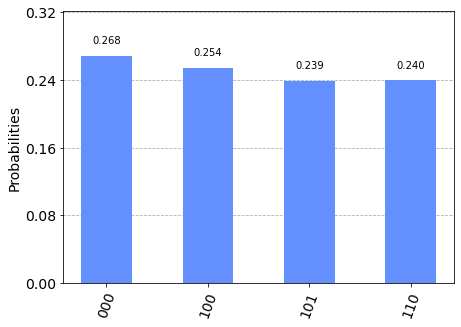

In [60]:
res = execute(circ, backend=simulator, shots=3000).result()
counts = res.get_counts()
print(counts)

plot_histogram(counts)


In [61]:
# Init connection
from qiskit import IBMQ
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-03-24 02:24:22,508: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [62]:
provider = IBMQ.get_provider(hub = 'ibm-q')
# qcomp = provider.get_backend('ibmq_lima')
qcomp = provider.get_backend('ibmq_belem')

In [63]:
import qiskit.tools.jupyter
%qiskit_job_watcher
from qiskit.tools.monitor import job_monitor
# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Job Status: job has successfully run
Meas_Matrix = 
 [[0.64941406 0.14550781 0.07128906 0.02246094 0.12792969 0.04003906
  0.02246094 0.        ]
 [0.12890625 0.61035156 0.01171875 0.07910156 0.03320312 0.125
  0.00292969 0.00878906]
 [0.05664062 0.02246094 0.66992188 0.15917969 0.01757812 0.00292969
  0.13574219 0.03417969]
 [0.01171875 0.05859375 0.109375   0.59179688 0.00292969 0.00683594
  0.02441406 0.12597656]
 [0.12304688 0.02929688 0.00878906 0.00195312 0.64648438 0.15625
  0.078125   0.02441406]
 [0.01757812 0.11914062 0.00195312 0.00878906 0.10742188 0.59765625
  0.01074219 0.06640625]
 [0.01074219 0.00292969 0.10351562 0.02734375 0.04882812 0.01757812
  0.60839844 0.140625  ]
 [0.00195312 0.01171875 0.0234375  0.109375   0.015625   0.05371094
  0.1171875  0.59960938]]


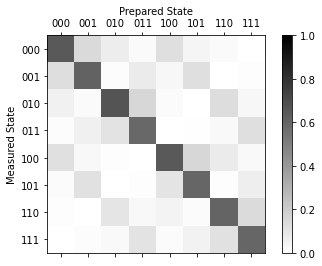

In [64]:
# Create measurment Filter

qr = QuantumRegister(3)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2], qr=qr)

job = execute(meas_calibs, backend=qcomp, shots = 1024, optimization_level=0)
job_monitor(job)

meas_fitter = CompleteMeasFitter(job.result(), state_labels)
print('Meas_Matrix = \n',meas_fitter.cal_matrix)
meas_fitter.plot_calibration()
mf = meas_fitter.filter

In [68]:
# Run circ on IBMQ

job = execute(circ, backend=qcomp, shots=7000)
circ_res = job.result()

# device_counts = circ_res.get_counts(circ)

        

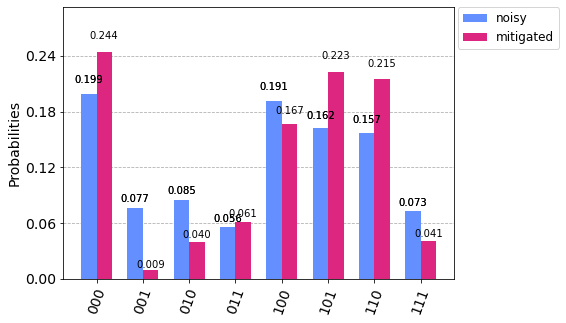

In [69]:
device_counts = circ_res.get_counts(circ)
mitigated_results = mf.apply(circ_res)
mitigated_counts = mitigated_results.get_counts(circ)

plot_histogram([device_counts, mitigated_counts], legend=['noisy', 'mitigated'])

In [67]:
%qiskit_job_watcher

job_monitor(job)


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Job Status: job has successfully run
